<a href="https://colab.research.google.com/github/arjunkrishnasr/data-analytics-digital-assignment/blob/main/22MCB0038_Arjun_Krishna_S_R_Data_Analytics_Digital_Assignment_1_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Arjun Krishna S R**

**Reg No: 22MCB0038**

**Subject: Data Analytics**

**Subject Code: MCSE615L**

In [1]:
#Import the necessary libraries
import pandas as pd

In [2]:
#Load the data
df = pd.read_csv('Real estate.csv')

**STEP 1**

**DATA CLEANING**

**The code snippet performs the following cleaning steps:**

**Drops any duplicate rows using the drop_duplicates() method.**

**Drops any rows with missing values using the dropna() method.**

**Converts the 'X1 transaction date' column to datetime format using the to_datetime() method.**

**Resets the index of the DataFrame using the reset_index() method.**

**After running the code, the cleaned DataFrame will be displayed. You can further process or analyze the cleaned data as per your requirements.**

In [4]:
#Drop any duplicate rows
df = df.drop_duplicates()

In [5]:
#Drop any rows with missing values
df = df.dropna()

In [6]:
# Convert the transaction date column to datetime type
df['X1 transaction date'] = pd.to_datetime(df['X1 transaction date'], format='%Y.%m')

In [7]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [8]:
# Display the cleaned DataFrame
print(df)

      No           X1 transaction date  X2 house age  \
0      1 1970-01-01 00:00:00.000002012          32.0   
1      2 1970-01-01 00:00:00.000002012          19.5   
2      3 1970-01-01 00:00:00.000002013          13.3   
3      4 1970-01-01 00:00:00.000002013          13.3   
4      5 1970-01-01 00:00:00.000002012           5.0   
..   ...                           ...           ...   
409  410 1970-01-01 00:00:00.000002013          13.7   
410  411 1970-01-01 00:00:00.000002012           5.6   
411  412 1970-01-01 00:00:00.000002013          18.8   
412  413 1970-01-01 00:00:00.000002013           8.1   
413  414 1970-01-01 00:00:00.000002013           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3      

**Step 2:**

**Feature Selection**

**Feature selection is an important step in machine learning to identify the most relevant features that contribute significantly to the prediction task.**

**1. Correlation Matrix**

**The correlation matrix measures the linear relationship between features. Features with high correlation may indicate redundancy, and we can remove one of them. Here is how you can perform feature selection using a correlation matrix:**

In [9]:
#import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

<ipython-input-10-b5ae51ccccb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


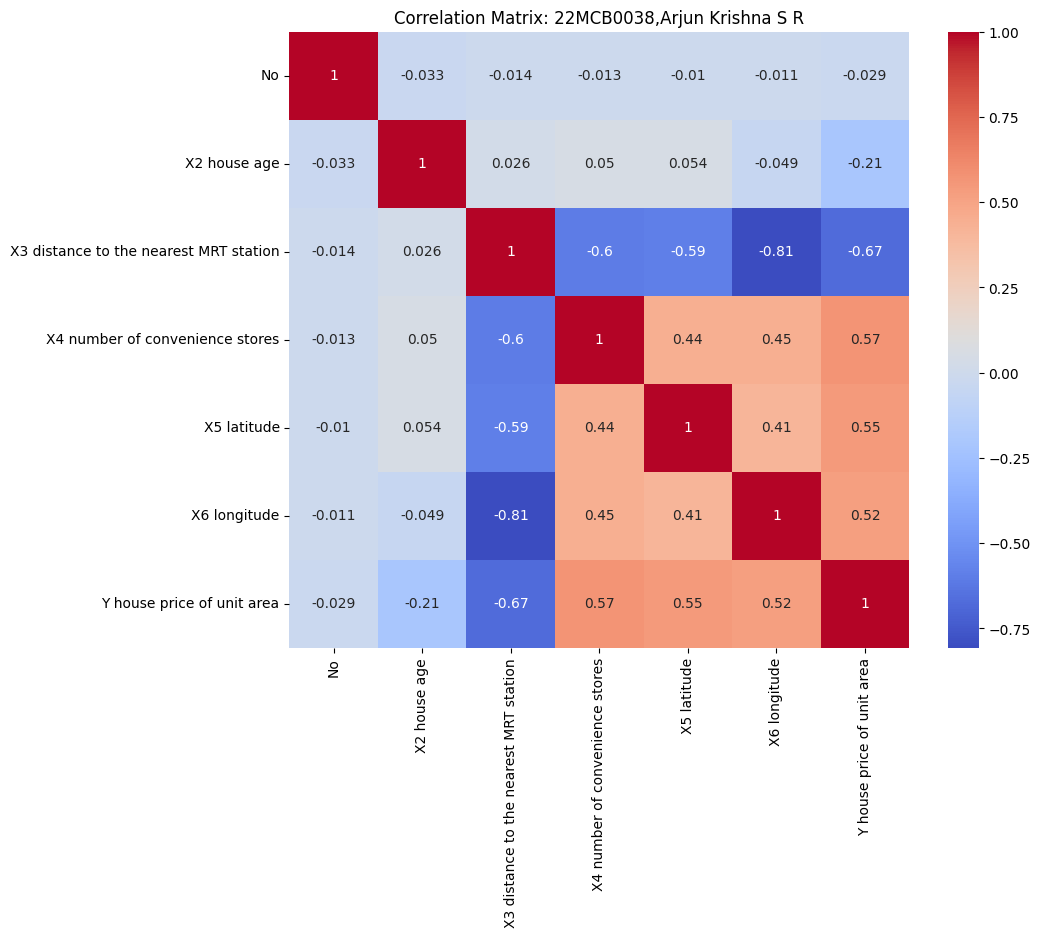

In [12]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: 22MCB0038,Arjun Krishna S R')
plt.show()

**2.Random Forest Classifer for feature selection**

**Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.**

In [37]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [43]:
df['year'] = df['X1 transaction date'].dt.year
df['month'] = df['X1 transaction date'].dt.month
df['day'] = df['X1 transaction date'].dt.day
df['hour'] = df['X1 transaction date'].dt.hour

X = df.drop(['X1 transaction date'], axis=1)


In [55]:
from sklearn.ensemble import RandomForestRegressor


In [51]:
# Create a random forest regressor model
rf = RandomForestRegressor()

In [53]:
# Fit the model to your data
rf.fit(X, y)

RandomForestRegressor()

In [54]:
# Get the feature importances
feature_importances = rf.feature_importances_

In [56]:
# Print the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: No, Importance: 0.00013074727769454755
Feature: X2 house age, Importance: 0.00013766373547799976
Feature: X3 distance to the nearest MRT station, Importance: 0.0001289009317767676
Feature: X4 number of convenience stores, Importance: 0.002967069349654509
Feature: X5 latitude, Importance: 0.0006502818394205581
Feature: X6 longitude, Importance: 0.007428716347179965
Feature: Y house price of unit area, Importance: 0.9885566205187957
Feature: year, Importance: 0.0
Feature: month, Importance: 0.0
Feature: day, Importance: 0.0
Feature: hour, Importance: 0.0


**Step 3:**

**Feature Elimination**

**It seems that the target variable in the dataset is continuous, and the RFE algorithm expects a binary or multiclass target variable. RFE is typically used for classification tasks rather than regression tasks.**

**If you have a regression task and want to perform feature elimination, you can use Recursive Feature Elimination with Cross-Validated (RFECV) algorithm with a different estimator suitable for regression, such as RandomForestRegressor or LinearRegression.**

**Here is how to use RandomForestRegressor for feature elimination in a regression task:**

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [81]:
# Create the Random Forest Regressor
rf = RandomForestRegressor()

In [82]:
# Create the RFECV object with cross-validation
rfecv = RFECV(estimator=rf, step=1, cv=KFold(5), scoring='neg_mean_squared_error'

In [83]:
# Fit the RFECV object to the data
rfecv.fit(X, y)

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(), scoring='neg_mean_squared_error')

In [ ]:
# Get the selected feature indices
selected_indices = rfecv.support_

In [84]:
# Get the selected feature names
selected_features = X.columns[selected_indices]

In [85]:
# Print the selected feature names
for feature in selected_features:
    print(feature)

No
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
year
month
day
hour


**Step 4:**

**Perform Root Node Selection for the following dataset**

**Here we use Random Forest Regressor**

**The Random Forest Regressor is a machine learning algorithm that is based on the Random Forest ensemble method and is used for regression tasks. It is an extension of the Random Forest Classifier and is capable of solving regression problems by predicting continuous numerical values.**

**In a Random Forest Regressor, multiple decision trees are created, each using a random subset of the features and training data. During the training process, each decision tree is built by recursively splitting the data based on feature values to minimize the mean squared error (MSE) or another suitable loss function**


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances from the trained model
feature_importances = rf.feature_importances_

# Get the indices of the features sorted by importance (descending order)
sorted_indices = feature_importances.argsort()[::-1]

# Get the top feature name
top_feature = X.columns[sorted_indices[0]]

# Print the top feature name
print(f"Top Feature: {top_feature}")


Top Feature: X3 distance to the nearest MRT station


**Step 5:**

**Visualizations of models**

**Box Plot**

**A box plot, also known as a box-and-whisker plot, is a graphical representation of a dataset's summary statistics. It provides a visual summary of the distribution of the data, including measures of central tendency, variability, and potential outliers.**

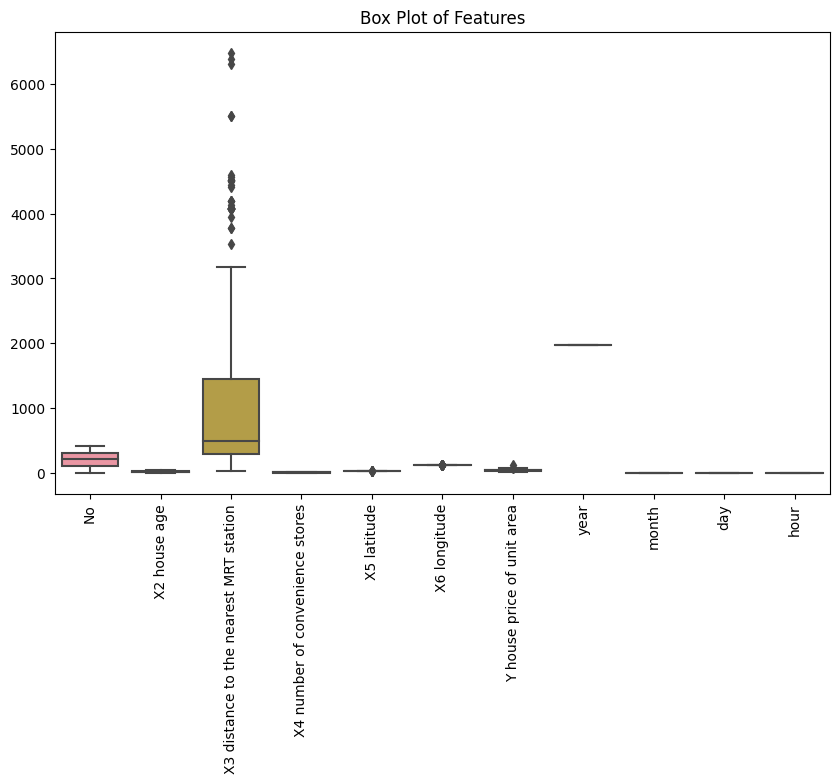

In [94]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Features - 22MCB0038')
plt.xticks(rotation=90)
plt.show()


**Histogram**

**A histogram is a graphical representation of the distribution of a dataset. It is a way to visualize the frequency or count of data points falling into specific intervals, known as bins. The x-axis of a histogram represents the range of values in the dataset, divided into equal-sized bins, and the y-axis represents the frequency or count of data points in each bin.**

<Figure size 1000x600 with 0 Axes>

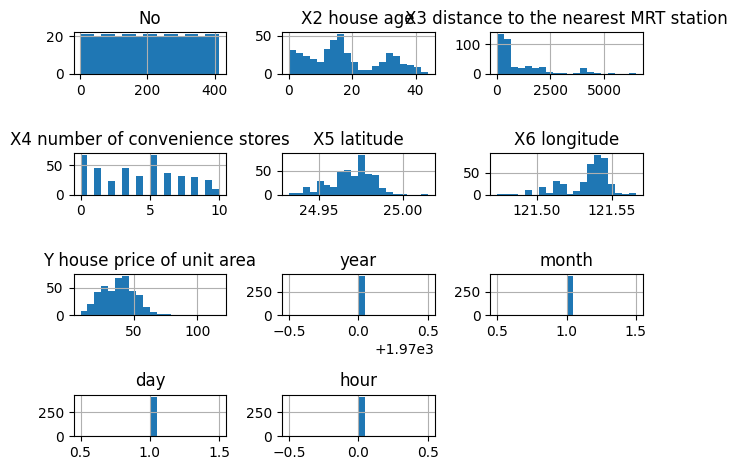

In [97]:
# Histogram
plt.figure(figsize=(10, 6))
df.hist(bins=20)
plt.tight_layout()
plt.show()


**Pairwise Scatter Plot**

**A pairwise scatter plot, also known as a scatter matrix or scatterplot matrix, is a grid of scatter plots that visualizes the relationships between multiple variables in a dataset. It allows us to examine the pairwise correlations and patterns between variables by plotting each variable against every other variable.**

<Figure size 1200x800 with 0 Axes>

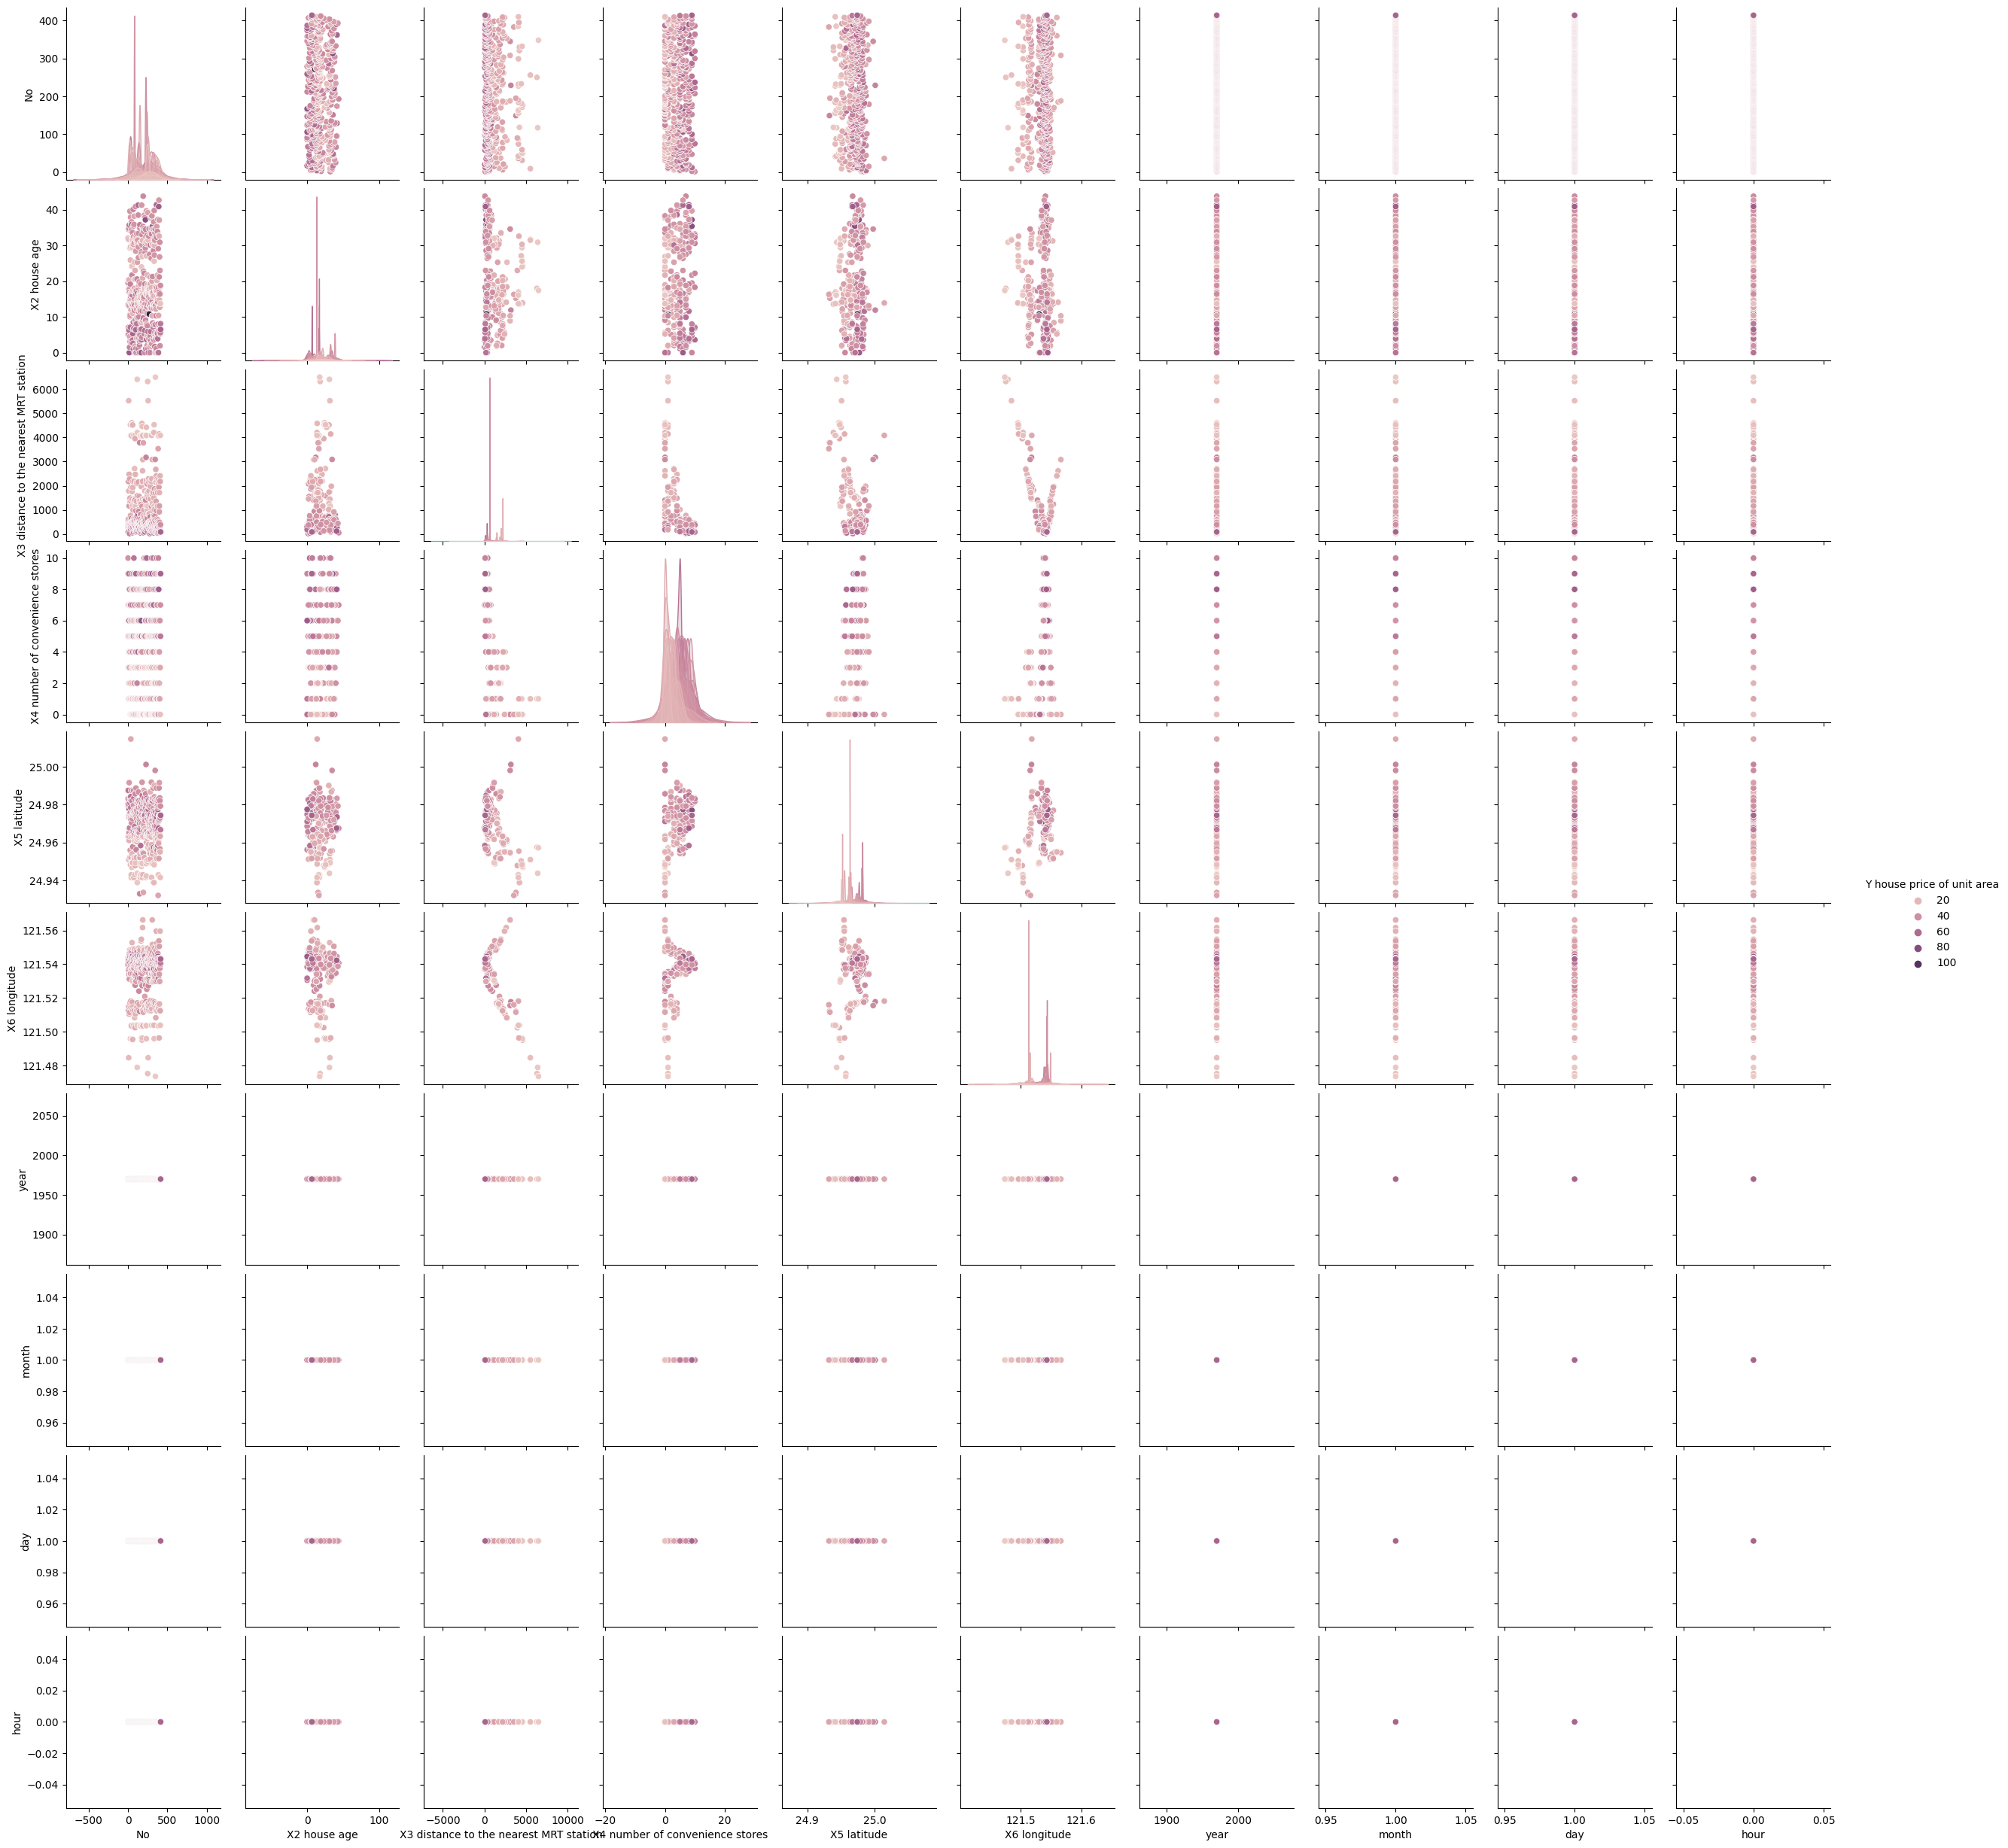

In [99]:
# Pairwise Scatter Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Y house price of unit area')
plt.show()

**Correlation Heatmap**

**A correlation heatmap is a graphical representation of the correlation matrix, which shows the pairwise correlations between variables in a dataset. It uses color-coded cells to indicate the strength and direction of the correlations between variables.**

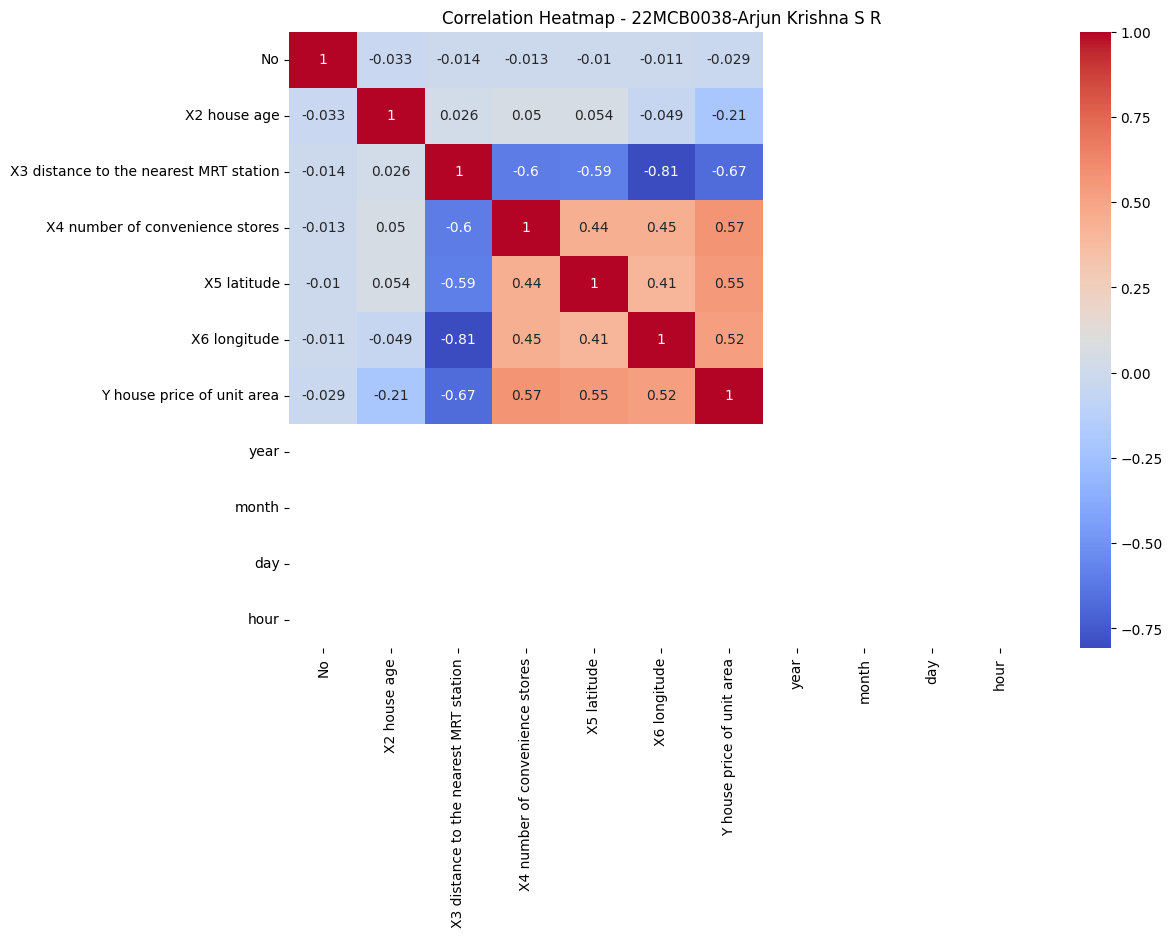

In [105]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - 22MCB0038-Arjun Krishna S R')
plt.show()

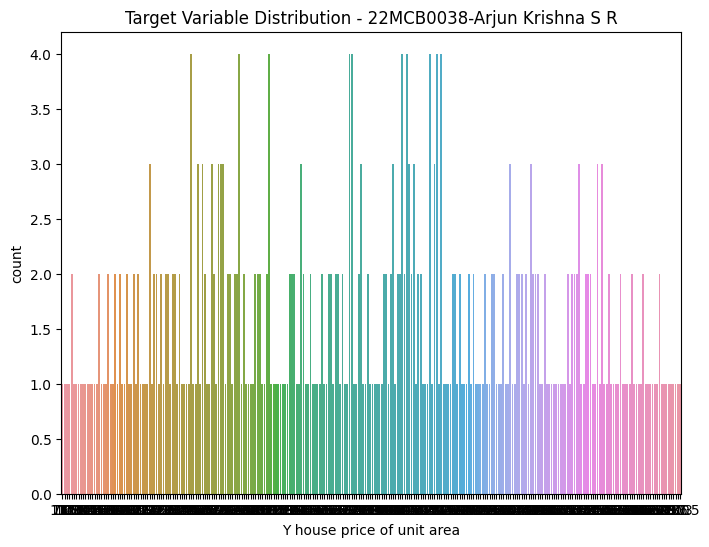

In [104]:
# Bar Plot of Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Y house price of unit area', data=df)
plt.title('Target Variable Distribution - 22MCB0038-Arjun Krishna S R')
plt.show()


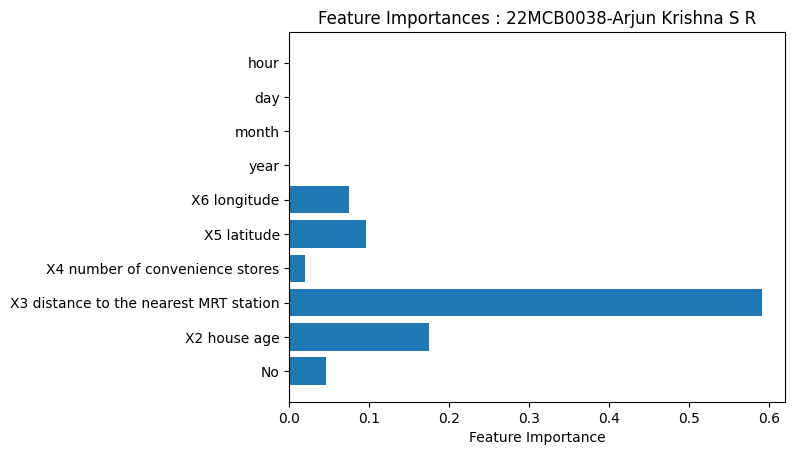

In [107]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances as a bar plot
ax.barh(range(len(feature_importances)), feature_importances, align='center')

# Set the y-axis ticks and labels
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(X.columns)

# Set the x-axis label
ax.set_xlabel('Feature Importance')

# Set the title
ax.set_title('Feature Importances : 22MCB0038-Arjun Krishna S R')

# Show the plot
plt.show()


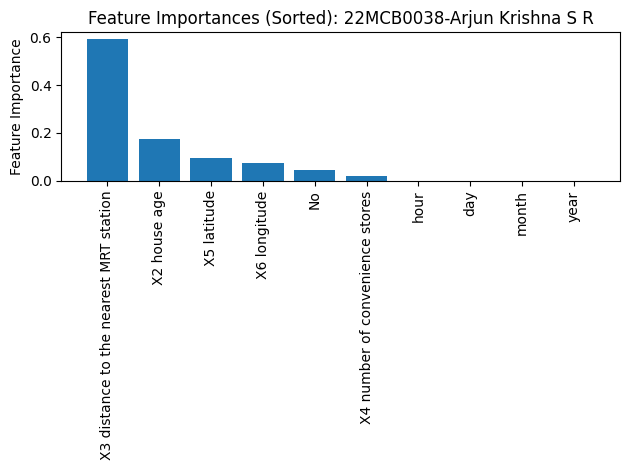

In [108]:
import matplotlib.pyplot as plt

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the sorted feature importances as a bar plot
ax.bar(range(len(feature_importances)), sorted_importances)

# Set the x-axis ticks and labels
ax.set_xticks(range(len(feature_importances)))
ax.set_xticklabels(sorted_features, rotation=90)

# Set the y-axis label
ax.set_ylabel('Feature Importance')

# Set the title
ax.set_title('Feature Importances (Sorted): 22MCB0038-Arjun Krishna S R')

# Show the plot
plt.tight_layout()
plt.show()


**Pie Chart**

**A pie chart is a circular statistical graphic that is divided into sectors, where each sector represents a proportion or percentage of a whole. It is used to visualize the distribution of a categorical variable and show the relative sizes of different categories.**

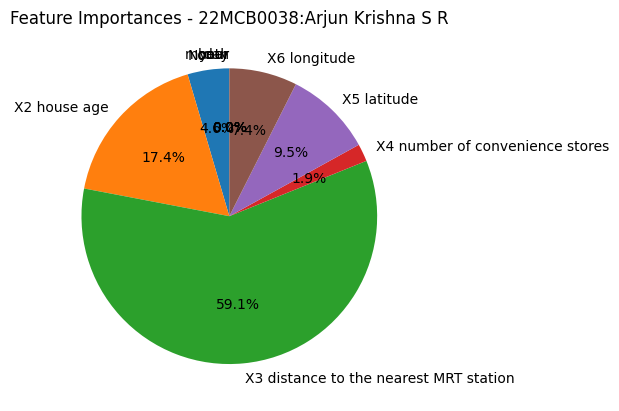

In [110]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances as a pie chart
ax.pie(feature_importances, labels=X.columns, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Feature Importances - 22MCB0038:Arjun Krishna S R')

# Show the plot
plt.show()


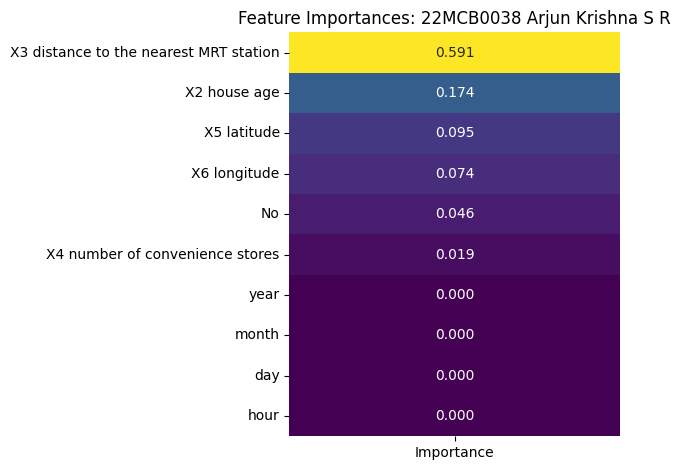

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances as a heatmap
sns.heatmap(importance_df[['Importance']], yticklabels=importance_df['Feature'], cmap='viridis', annot=True, fmt='.3f', cbar=False, ax=ax)

# Set the title
ax.set_title('Feature Importances: 22MCB0038 Arjun Krishna S R')

# Rotate the y-axis tick labels for better visibility
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


**RESULT**

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
# Split the data into features (X) and target variable (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [121]:
# Create a linear regression model
model = LinearRegression()

In [122]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [123]:
# Predict the prices for the test data
y_pred = model.predict(X_test)

In [124]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [128]:
# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Mean Squared Error: 55.4297617616353
Root Mean Squared Error: 7.4451166385514265
R^2 Score: 0.6695884228951925
